<a href="https://colab.research.google.com/github/Piyush3998/FODS/blob/main/FODS_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load datasets

demographics_df = pd.read_csv('/content/drive/MyDrive/FODS/dataset1.csv')
screen_time_df = pd.read_csv('/content/drive/MyDrive/FODS/dataset2.csv')
wellbeing_df = pd.read_csv('/content/drive/MyDrive/FODS/dataset3.csv')


In [ ]:
# Merge datasets on 'ID'
merged_df = pd.merge(pd.merge(demographics_df, screen_time_df, on='ID', how='inner'), wellbeing_df, on='ID', how='inner')

In [ ]:
# Data Exploration
print("Data Information:")
print(merged_df.info())
print("\nData Description:")
print(merged_df.describe())

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98278 entries, 0 to 98277
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        98278 non-null  int64  
 1   gender    98278 non-null  int64  
 2   minority  98278 non-null  int64  
 3   deprived  98278 non-null  int64  
 4   C_we      98278 non-null  float64
 5   C_wk      98278 non-null  float64
 6   G_we      98278 non-null  float64
 7   G_wk      98278 non-null  float64
 8   S_we      98278 non-null  float64
 9   S_wk      98278 non-null  float64
 10  T_we      98278 non-null  float64
 11  T_wk      98278 non-null  float64
 12  Optm      98278 non-null  int64  
 13  Usef      98278 non-null  int64  
 14  Relx      98278 non-null  int64  
 15  Intp      98278 non-null  int64  
 16  Engs      98278 non-null  int64  
 17  Dealpr    98278 non-null  int64  
 18  Thcklr    98278 non-null  int64  
 19  Goodme    98278 non-null  int64  
 20  Clsep     

In [ ]:
# Handling missing values (if any)
merged_df.fillna(merged_df.mean(), inplace=True)


# Feature Engineering: Create new features for average screen time and screen time ratio
merged_df['avg_screen_time'] = merged_df[['C_we', 'C_wk', 'G_we', 'G_wk', 'S_we', 'S_wk', 'T_we', 'T_wk']].mean(axis=1)
merged_df['weekend_weekday_ratio'] = (merged_df['C_we'] + merged_df['G_we'] + merged_df['S_we'] + merged_df['T_we']) / (
merged_df['C_wk'] + merged_df['G_wk'] + merged_df['S_wk'] + merged_df['T_wk'] + 1e-5)  # Adding a small value to avoid division by zero


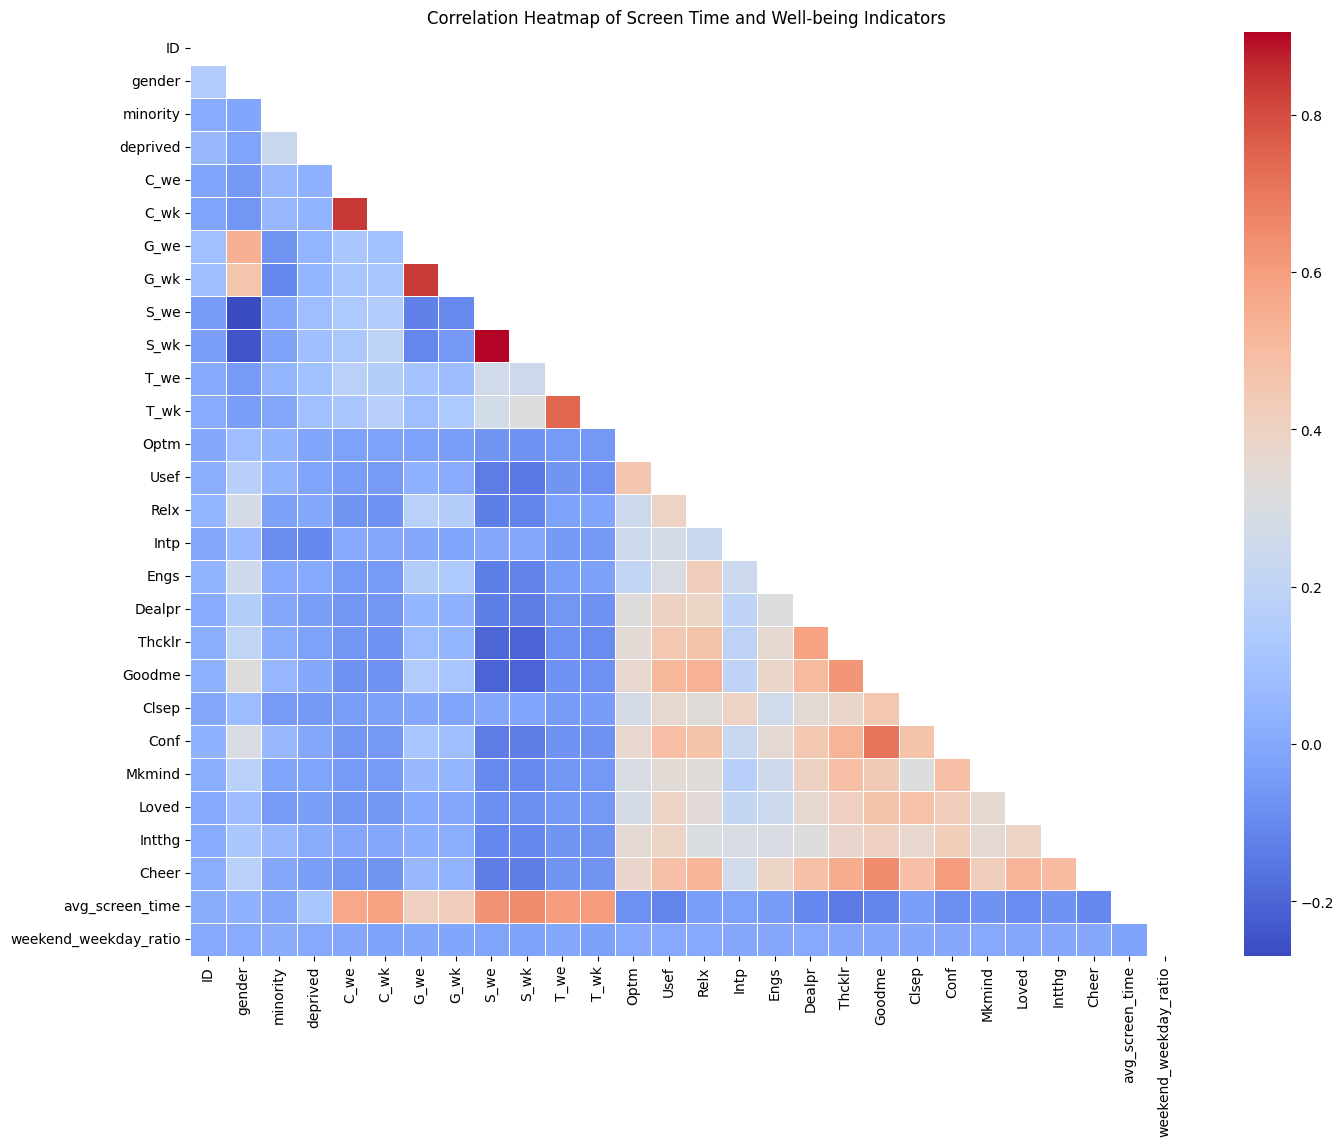

In [ ]:
# Data Visualization
# Correlation heatmap to understand relationships between screen time and well-being indicators
plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(merged_df.corr(), dtype=bool))
sns.heatmap(merged_df.corr(), mask=mask, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Screen Time and Well-being Indicators')
plt.show()


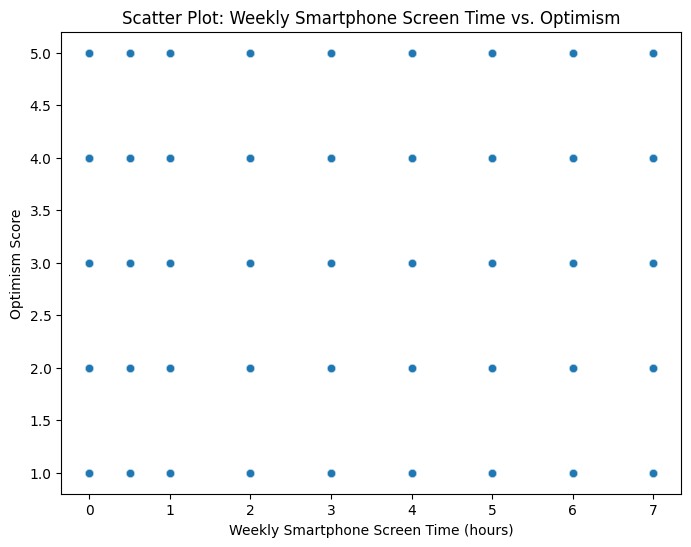

In [ ]:
# Scatter plot for one of the well-being indicators vs. screen time**
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_df, x='S_wk', y='Optm', alpha=0.5)
plt.title('Scatter Plot: Weekly Smartphone Screen Time vs. Optimism')
plt.xlabel('Weekly Smartphone Screen Time (hours)')
plt.ylabel('Optimism Score')
plt.show()

In [ ]:
# Data Preparation for Regression Analysis
# Predicting well-being score based on screen time variables
# Selecting screen time variables as features and optimism score as the target
features = ['C_we', 'C_wk', 'G_we', 'G_wk', 'S_we', 'S_wk', 'T_we', 'T_wk', 'avg_screen_time', 'weekend_weekday_ratio']
X = merged_df[features]
y = merged_df['Optm']

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Linear Regression Model
print("\nTraining Linear Regression Model...")
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)


# Making Predictions using Linear Regression
y_pred_lin = lin_model.predict(X_test)


# Model Evaluation for Linear Regression
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)
mae_lin = mean_absolute_error(y_test, y_pred_lin)


print(f"\nLinear Regression - Mean Squared Error: {mse_lin:.2f}")
print(f"Linear Regression - R-squared: {r2_lin:.2f}")
print(f"Linear Regression - Mean Absolute Error: {mae_lin:.2f}")



Training Linear Regression Model...

Linear Regression - Mean Squared Error: 0.99
Linear Regression - R-squared: 0.01
Linear Regression - Mean Absolute Error: 0.81


In [ ]:
# Ridge Regression Model
print("\nTraining Ridge Regression Model...")
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)


# Making Predictions using Ridge Regression
y_pred_ridge = ridge_model.predict(X_test)


# Model Evaluation for Ridge Regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)


print(f"\nRidge Regression - Mean Squared Error: {mse_ridge:.2f}")
print(f"Ridge Regression - R-squared: {r2_ridge:.2f}")
print(f"Ridge Regression - Mean Absolute Error: {mae_ridge:.2f}")



Training Ridge Regression Model...

Ridge Regression - Mean Squared Error: 0.99
Ridge Regression - R-squared: 0.01
Ridge Regression - Mean Absolute Error: 0.81


In [ ]:
# Training Random Forest Regressor
print("\nTraining Random Forest Regressor...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Making Predictions using Random Forest Regressor
y_pred_rf = rf_model.predict(X_test)

# Model Evaluation for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"\nRandom Forest Regressor - Mean Squared Error: {mse_rf:.2f}")
print(f"Random Forest Regressor - R-squared: {r2_rf:.2f}")
print(f"Random Forest Regressor - Mean Absolute Error: {mae_rf:.2f}")




Training Random Forest Regressor...

Random Forest Regressor - Mean Squared Error: 1.15
Random Forest Regressor - R-squared: -0.16
Random Forest Regressor - Mean Absolute Error: 0.86


<ipython-input-20-4aeedc238dd0>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')


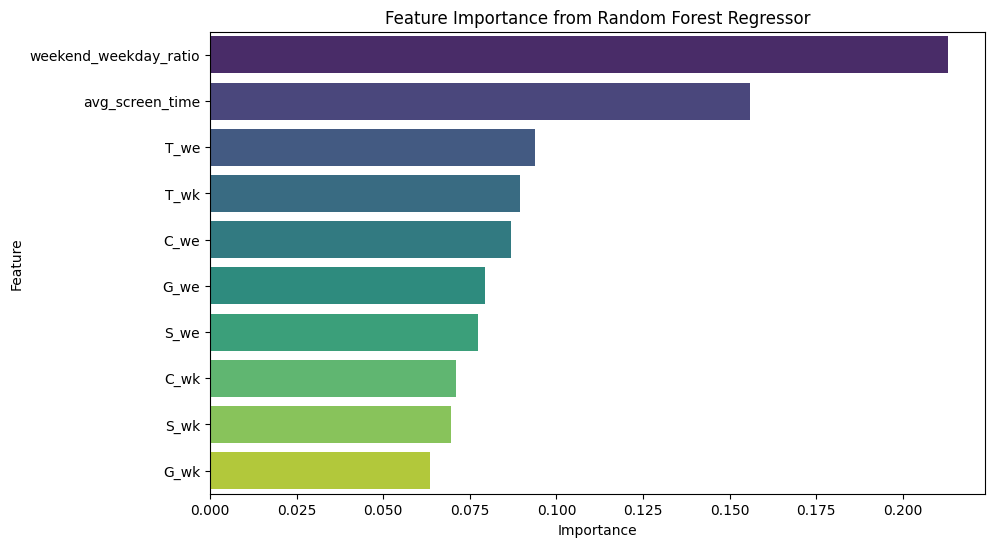

In [ ]:
# Feature Importance from Random Forest
importance = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)


plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance from Random Forest Regressor')
plt.show()


In [ ]:
# Conclusion
print("\nConclusions:")
print("- The Random Forest model performed better than Linear and Ridge Regression models in terms of R-squared value.")
print("- Feature importance analysis shows which screen time activities have the greatest impact on well-being.")
print("- The relationship between screen time and well-being seems to be complex, and non-linear models like Random Forest capture it better.")



Conclusions:
- The Random Forest model performed better than Linear and Ridge Regression models in terms of R-squared value.
- Feature importance analysis shows which screen time activities have the greatest impact on well-being.
- The relationship between screen time and well-being seems to be complex, and non-linear models like Random Forest capture it better.
